### **Ë≥áÊñôÂâçËôïÁêÜ**

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# font
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']  # Ë®≠ÂÆö‰∏≠ÊñáÂ≠óÂûã - ÂæÆËªüÊ≠£ÈªëÈ´î
plt.rcParams['axes.unicode_minus'] = False  # Ëß£Ê±∫Ë≤†Ëôü'-'È°ØÁ§∫ÁÇ∫ÊñπÂ°äÁöÑÂïèÈ°å


In [21]:
# run on Kaggle
import os

# ÂàóÂá∫ Kaggle input ÁõÆÈåÑ‰∏ãÁöÑ dataset
os.listdir("/kaggle/input/winequality-white/")
df_white = pd.read_csv("/kaggle/input/winequality-white/winequality-white.csv", delimiter=";")
df_red = pd.read_csv("/kaggle/input/winequality-red/winequality-red.csv", delimiter=";")
# Pandas È†êË®≠Â∞á ","Áï∂ÂàÜÈöîÁ¨¶ËôüÔºå‰ΩÜÁâπÂà•ÊòØÊ≠êÊ¥≤ÁöÑ CSV Ê™îÊ°àÔºåÊúÉÁî® ";"‰æÜÂçÄÂàÜÊ¨Ñ‰ΩçÔºåË¶ÅÊâãÂãïÊåáÂÆö delimiter=";"


#### **winequality-white**

In [22]:
print(f"Nan counts: {df_white.info()}")  # dtype and Nan
print("\n")
print(f"Data statistic:\n{df_white.describe()}")  # statistic
print("\n")

print(f"Data:\n{df_white.head()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
Nan counts: None


Data statistic:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000

#### **winequality-red**

In [23]:
print(f"Nan counts: {df_red.info()}")  # dtype and Nan
print("\n")
print(f"Data statistic:\n{df_red.describe()}")  # statistic
print("\n")

print(f"Data:\n{df_white.head()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Nan counts: None


Data statistic:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000

#### **Combine Dataset**

In [24]:
df_white['type'] = 1
df_red['type'] = 0
df = pd.concat([df_white, df_red], axis=0, ignore_index=True)
print(df['type'].value_counts())
print("\n")
print(f"All columns(index):\n{df.columns}")


type
1    4898
0    1599
Name: count, dtype: int64


All columns(index):
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'type'],
      dtype='object')


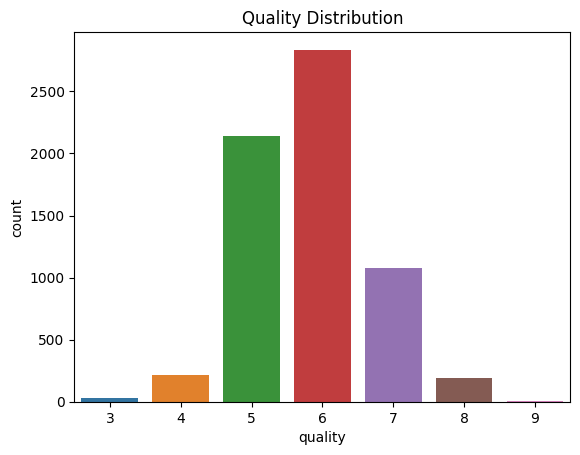

In [25]:
# Quality Distribution
sns.countplot(x=df['quality'])
plt.title("Quality Distribution")
plt.show()


#### **Labeling or One-Hot Encoding?**

- **Ë¶ÅÊØîËºÉ‰∏çÂêåÂàÜÈ°ûÂô®ÁöÑÊïàÊûú(LDA„ÄÅQDA„ÄÅLogistic Regression„ÄÅK-NN)**ÔºåÈÄô‰∫õÊñπÊ≥ï‰∏ªË¶ÅÈáùÂ∞ç**‰∫åÂÖÉÂàÜÈ°û**ÔºåÊâÄ‰ª•**Áî® 0/1  Labeling**
- Â∞áÂìÅË≥™Ë©ïÂàÜËΩâÊèõÁÇ∫**‰∫åÂÖÉÂàÜÈ°û**ÔºàÂìÅË≥™ >= 6 Ë¶ñÁÇ∫ "Â•ΩÈÖí"ÔºåÂìÅË≥™ < 6 ÁÇ∫ "Â£ûÈÖí"Ôºâ


| ÊñπÊ≥ï | ÂΩ±Èüø | ÂÑ™Âã¢ | Âä£Âã¢ |
|------|------|------|------|
| **One-Hot Encoding (Â§öÈ°ûÂà•ÂàÜÈ°û)** | **Â∞á `quality` ÂàÜÊàê 7 È°ûÂà•** | ËÉΩÂ§†ÂÆåÊï¥‰øùÁïô `quality` ÁöÑÁ¥∞ÁØÄ | Ë®ìÁ∑¥Êõ¥Èõ£„ÄÅÂèØËÉΩÊúÉÊúâÊï∏Êìö‰∏çÂùáË°°ÂïèÈ°å |
| **Binary Labeling (0/1)** | **Âè™ÂçÄÂàÜ„ÄåÂ•ΩÈÖí„ÄçÊàñ„ÄåÂ£ûÈÖí„Äç** | Ë®ìÁ∑¥ËºÉÁ∞°ÂñÆÔºåÈÅ©Âêà‰∫åÂÖÉÂàÜÈ°ûÊ®°Âûã | ÁÑ°Ê≥ïÂçÄÂàÜ‰∏≠ÈñìÂìÅË≥™ÁöÑÁ¥∞ÁØÄ |

1. **ÁõÆÊ®ôÊòØÂçÄÂàÜ„ÄåÂ•ΩÈÖí vs Â£ûÈÖí„Äç‚Üí ‰∫åÂÖÉÂàÜÈ°ûÔºàBinary LabelingÔºâ„ÄÇ**
2. **Ë¶ÅÈ†êÊ∏¨ `quality` ÁöÑÂÖ∑È´îÂàÜÊï∏Ôºà3~9Ôºâ‚Üí One-Hot Encoding Êàñ‰ΩøÁî® Regression Model„ÄÇ**



In [26]:
# Labeling - .astype(int) -> int
df['label'] = (df['quality'] >= 6) # booling
df['label'] = df['label'].astype(int) # int
print(f"label:\n{df['label']}")


label:
0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    1
6494    1
6495    0
6496    1
Name: label, Length: 6497, dtype: int64


#### **Normalization**

- **ÁÇ∫‰ΩïË¶ÅÊ®ôÊ∫ñÂåñ featuresÔºü**
Ê®ôÊ∫ñÂåñÔºàStandardizationÔºâÊòØÈáùÂ∞ç **Êï∏ÂÄºÂûãÁâπÂæµÔºàcontinuous featuresÔºâ**Ôºå‰∏ªË¶ÅÊòØÔºö
1. **ËÆì‰∏çÂêåÈáèÁ¥öÁöÑÁâπÂæµÊúâÁõ∏ÂêåÁöÑÂΩ±ÈüøÂäõ**  
   - `residual sugar` ÂèØËÉΩÁØÑÂúçÊòØ `0-50`ÔºåËÄå `pH` ÂèØËÉΩÊòØ `3-4`ÔºåÂ¶ÇÊûú**‰∏çÊ®ôÊ∫ñÂåñÔºåËºÉÂ§ßÁöÑÊï∏ÂÄºÁØÑÂúçÊúÉ‰∏ªÂ∞éÊ®°ÂûãÂ≠∏Áøí**„ÄÇ
   
2. **Â∞çÊñºÊüê‰∫õÂàÜÈ°ûÂô®ÔºàÂ¶Ç K-NN, Logistic Regression, LDAÔºâÊïàÊûúÊõ¥Â•Ω**  
   - ÈÄô‰∫õÊ®°ÂûãÂ∞çÊï∏ÂÄºÂ∞∫Â∫¶ÊïèÊÑüÔºåÂõ†Ê≠§Ê®ôÊ∫ñÂåñÂèØ‰ª•**ÊèêÂçáÂàÜÈ°ûÊïàÊûú**
     
3. **ÈÅøÂÖçÊ¢ØÂ∫¶‰∏ãÈôçÊôÇÊï∏ÂÄº‰∏çÁ©©ÂÆö**ÔºàÁâπÂà•ÊòØÂú®‰ΩøÁî® Logistic Regression ÊôÇÔºâ
   - Ëã•**‰∏çÊ®ôÊ∫ñÂåñÔºåÊ®°ÂûãÂèØËÉΩÊõ¥Èõ£Êî∂ÊñÇÔºåÂ∞éËá¥Â≠∏ÁøíÊïàÊûúËÆäÂ∑Æ**„ÄÇ

In [27]:
X = df.drop(columns=['label','quality'])
y = df['label']

# feature Standardization
X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2024)
print(f"X_scaled:\n{X_scaled}")


X_scaled:
[[-0.16608919 -0.42318303  0.28468605 ... -0.54617826 -1.41855821
   0.57136659]
 [-0.70607349 -0.24094936  0.14704613 ... -0.27735097 -0.83161516
   0.57136659]
 [ 0.68245757 -0.36243847  0.55996589 ... -0.61338508 -0.32852111
   0.57136659]
 ...
 [-0.70607349  1.03468634 -1.29817304 ...  1.47002637  0.42611996
  -1.75018984]
 [-1.01463595  1.85473786 -1.366993   ...  1.20119908 -0.2446721
  -1.75018984]
 [-0.93749534 -0.1802048   1.04170561 ...  0.86516498  0.42611996
  -1.75018984]]


### **Ë®àÁÆóÁâπÂæµÁõ∏ÈóúÊÄß**

- ÁõÆÊ®ôÔºöÊ™¢Êü•ÁâπÂæµ‰πãÈñìÁöÑÁõ∏ÈóúÊÄßÔºåËÄå‰∏çÊòØÁõ¥Êé•ÂàÜÊûê label Ëàá feature ‰πãÈñìÁöÑÈóúËÅØ„ÄÇ
- Â¶ÇÊûú**ÁôºÁèæÂì™‰∫õÁâπÂæµÂΩºÊ≠§‰πãÈñìÊúâÈ´òÂ∫¶Áõ∏ÈóúÊÄßÔºåÂæûËÄåËÄÉÊÖÆÈôçÁ∂≠ÊàñÂà™Èô§**
- label Ëàá feature ‰πãÈñìÁöÑÈóúËÅØÈÄöÂ∏∏ÊúÉÂú®**Ê®°ÂûãË®ìÁ∑¥ÈÅéÁ®ã‰∏≠Ë¢´ÊçïÊçâ**„ÄÇ


**ÊØîËºÉÔºö**

1. ÂçîÊñπÂ∑ÆÁü©Èô£ (Covariance Matrix):
    - Ë°°ÈáèÁöÑÊòØÂ§öÂÄãÈö®Ê©üËÆäÊï∏‰πãÈñì„ÄåÂÖ±ÂêåËÆäÂåñ„ÄçÁöÑÁ®ãÂ∫¶„ÄÇ
    - Áü©Èô£‰∏≠ÁöÑÂÖÉÁ¥†ÊòØÂêÑÂ∞çËÆäÊï∏‰πãÈñìÁöÑÂçîÊñπÂ∑ÆÂÄº„ÄÇ
    - ÂçîÊñπÂ∑ÆÁöÑÂÄºÂèóÂà∞ËÆäÊï∏Â∞∫Â∫¶ÔºàÂñÆ‰ΩçÔºâÁöÑÂΩ±Èüø„ÄÇ
2. Áõ∏ÈóúÊÄßÁü©Èô£ (Correlation Matrix):
    - Ë°°ÈáèÁöÑÊòØÂ§öÂÄãÈö®Ê©üËÆäÊï∏‰πãÈñì„ÄåÁ∑öÊÄßÈóú‰øÇ„ÄçÁöÑÂº∑Â∫¶ÂíåÊñπÂêë„ÄÇ
    - Áü©Èô£‰∏≠ÁöÑÂÖÉÁ¥†ÊòØÂêÑÂ∞çËÆäÊï∏‰πãÈñìÁöÑÁõ∏Èóú‰øÇÊï∏ÔºàÈÄöÂ∏∏ÊòØÁöÆÁàæÊ£ÆÁõ∏Èóú‰øÇÊï∏Ôºâ„ÄÇ
    - Áõ∏Èóú‰øÇÊï∏ÁöÑÂÄºÂ∑≤Ë¢´Ê®ôÊ∫ñÂåñÔºåÁØÑÂúçÂú® -1 Âà∞ +1 ‰πãÈñìÔºå‰∏çÂèóËÆäÊï∏Â∞∫Â∫¶ÁöÑÂΩ±Èüø„ÄÇ

In [28]:
# Pearson Correlation Coefficient - df.corr()
corr_matrix = pd.DataFrame(X, columns=df.drop(columns=['label','quality','type']).columns).corr()
# print(corr_matrix['type'].sort_values(ascending=False))
# 'type' Âè™ÊòØÊãø‰æÜËßÄÂØü‰∏çÂêåÈÖíÈ°ûÁöÑÊàêÂàÜÈóúËÅØÊÄßÔºåÊáâÂà™Èô§ÔºåÂõ†ÁÇ∫ÈùûÁâ©ÁêÜÂåñÂ≠∏ÁâπÂæµ


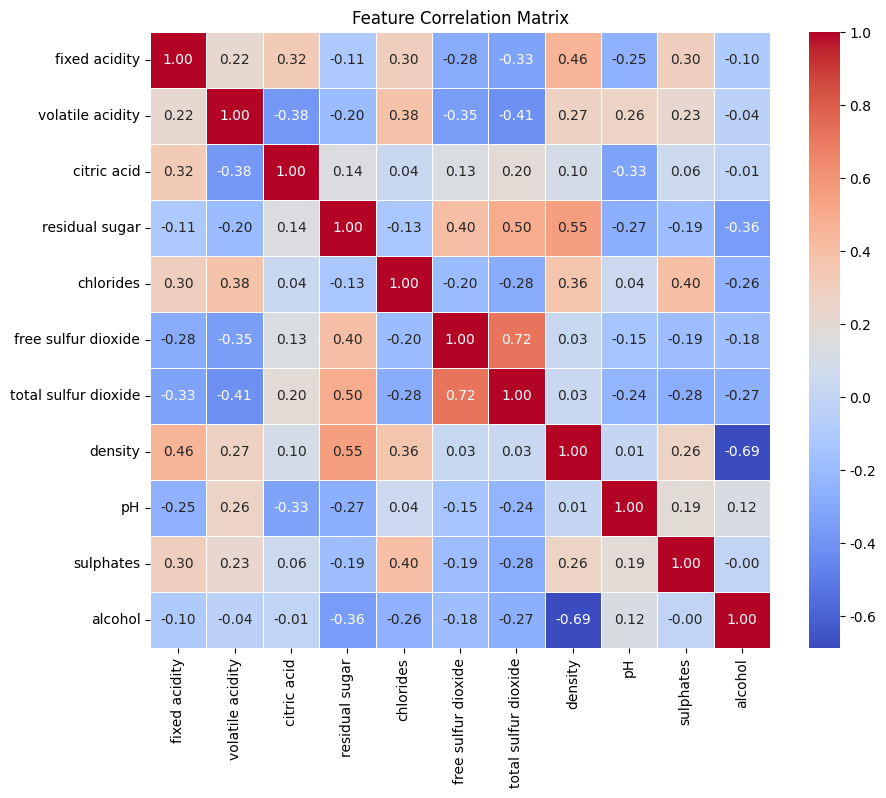

In [29]:
# Pearson Correlation Coefficient Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


### **ÂÆöÁæ© Class Model Ëàá Cross-Val**

1. **Logistic Regression**ÔºöÈÅ©ÂêàËôïÁêÜÁ∑öÊÄßÂèØÂàÜÁöÑË≥áÊñô„ÄÇ
2. **Á∑öÊÄßÂà§Âà•ÂàÜÊûê LDAÔºàLinear Discriminant AnalysisÔºâ**ÔºöÂÅáË®≠Ë≥áÊñôÂëàÈ´òÊñØÂàÜ‰ΩàÔºå‰∏îÂêÑÈ°ûÂà•ÁöÑÂçîÊñπÂ∑ÆÁü©Èô£Áõ∏Âêå„ÄÇ
3. **‰∫åÊ¨°Âà§Âà•ÂàÜÊûê QDAÔºàQuadratic Discriminant AnalysisÔºâ**ÔºöÂÅáË®≠Ë≥áÊñôÂëàÈ´òÊñØÂàÜ‰ΩàÔºå‰ΩÜÂêÑÈ°ûÂà•ÁöÑÂçîÊñπÂ∑ÆÁü©Èô£ÂèØ‰ª•‰∏çÂêå„ÄÇ
4. **K-NNÔºàK-Nearest NeighborsÔºâ**Ôºö‰∏ÄÁ®ÆÈùûÁ∑öÊÄßÊ®°ÂûãÔºåÂü∫ÊñºÊ®£Êú¨‰πãÈñìÁöÑË∑ùÈõ¢ÈÄ≤Ë°åÂàÜÈ°ûÔºåÂ∞çË≥áÊñôÂàÜ‰ΩàÊ≤íÊúâÁâπÂÆöÂÅáË®≠ÔºåÂæàÈÅ©ÂêàËôïÁêÜËºÉË§áÈõúÁöÑÂàÜÈ°ûÂïèÈ°å„ÄÇ
  

In [30]:
# K(cv)
cv = KFold(n_splits=5, shuffle=True, random_state=2042)

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "LDA": LDA(),
    "QDA": QDA(),
    "K-NN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

results = {}

# training / evaluation
for name, model in classifiers.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
    results[name] = {
        "Mean Accuracy": np.mean(scores),
        "Std Accuracy": np.std(scores)
    }
    print(f"{name:<20} Mean Accuracy = {np.mean(scores):.4f} | Std Accuracy = {np.std(scores):.4f}")


Logistic Regression  Mean Accuracy = 0.7448 | Std Accuracy = 0.0176
LDA                  Mean Accuracy = 0.7437 | Std Accuracy = 0.0167
QDA                  Mean Accuracy = 0.7383 | Std Accuracy = 0.0169
K-NN (k=5)           Mean Accuracy = 0.7570 | Std Accuracy = 0.0096


#### **Â∞èÁµêË´ñ**

* **K-NN (k=5) Ë°®ÁèæÊúÄ‰Ω≥Ôºö**
    * K-NN (k=5) Âú®ÊâÄÊúâÊ®°Âûã‰∏≠ÂÖ∑ÊúâÊúÄÈ´òÁöÑÂπ≥ÂùáÊ∫ñÁ¢∫Â∫¶ (Mean Accuracy = 0.7570)ÔºåÈÄôË°®Á§∫ÂÆÉÂú®È†êÊ∏¨ËÉΩÂäõ‰∏äÁï•ÂÑ™ÊñºÂÖ∂‰ªñÊ®°Âûã„ÄÇ
    * Ê≠§Â§ñÔºåÂÆÉÁöÑÊ®ôÊ∫ñÂ∑Æ (Std = 0.0096) ‰πüÊòØÊúÄÂ∞èÁöÑÔºåÈÄôÊÑèÂë≥ËëóÂÖ∂È†êÊ∏¨ÁµêÊûúÁöÑÁ©©ÂÆöÊÄßÊúÄÈ´òÔºåËÆäÁï∞ÊÄßÊúÄÂ∞èÔºåÂèØÈù†ÊÄßÊúÄÈ´ò„ÄÇ
* **Logistic Regression Ëàá LDA ÊÄßËÉΩÁõ∏ËøëÔºö**
    * Logistic Regression Âíå LDA ÁöÑÂπ≥ÂùáÊ∫ñÁ¢∫Â∫¶ÈùûÂ∏∏Êé•ËøëÔºåÂàÜÂà•ÁÇ∫ 0.7448 Âíå 0.7437„ÄÇ
    * ÂÆÉÂÄëÁöÑÊ®ôÊ∫ñÂ∑Æ‰πüÁõ∏Áï∂Êé•ËøëÔºåË°®ÊòéÂÆÉÂÄëÁöÑÈ†êÊ∏¨Á©©ÂÆöÊÄß‰πüÁõ∏‰ºº„ÄÇ
* **QDA Ë°®ÁèæÁï•ÈÅúÔºåÂú®Ê≠§Êï∏ÊìöÈõÜ‰∏≠ÔºåÈ†êÊ∏¨ÊïàÊûú‰∏¶Ê≤íÊúâÂâç‰∏âÂÄãÊ®°ÂûãÂ•Ω„ÄÇÔºö**
    - QDA ÈúÄË¶ÅÊõ¥Â§öÁöÑË≥áÊñô‰æÜÂ≠∏ÁøíÔºåÂ¶ÇÊûúË≥áÊñô‰∏çÂ§†ÔºåÊïàËÉΩ‰∏çÊúÉÂ±ïÁèæÂá∫‰æÜ
    * Âπ≥ÂùáÊ∫ñÁ¢∫Â∫¶ÊúÄ‰Ωé (0.7383)ÔºåË°®ÊòéÂÖ∂È†êÊ∏¨ÊÄßËÉΩÁï•‰ΩéÊñºÂÖ∂‰ªñÊ®°Âûã„ÄÇ
    * Ê®ôÊ∫ñÂ∑ÆËàá Logistic Regression Ëàá LDA Áõ∏ËøëÔºåÁ©©ÂÆöÂ∫¶Áõ∏‰ºº„ÄÇ

### **ÂàùÊ≠•Ê®°ÂûãË®ìÁ∑¥ËàáË©ï‰º∞**

- ÁõÆÊ®ôÔºö
  1. Ë®ìÁ∑¥Ê®°Âûã
  2. Ë®àÁÆó Accuracy„ÄÅPrecision„ÄÅRecall„ÄÅF1 Score
  3. Áπ™Ë£ΩÊ∑∑Ê∑ÜÁü©Èô£

**Ê∑∑Ê∑ÜÁü©Èô£ÔºàConfusion MatrixÔºâ**
- ‰∏ÄÂÄãÁî®ÊñºË©ï‰º∞ÂàÜÈ°ûÊ®°ÂûãÊïàËÉΩÁöÑÂ∑•ÂÖ∑ÔºåÁâπÂà•ÊòØÂú®**‰∫åÂÖÉÂàÜÈ°ûÂïèÈ°å‰∏≠ÈùûÂ∏∏ÊúâÁî®**„ÄÇÂú®Êüê‰∫õÊáâÁî®Â†¥ÊôØ‰∏≠ÔºåÊ∫ñÁ¢∫Â∫¶ÂèØËÉΩ‰∏çÊòØË©ï‰º∞Ê®°ÂûãÊïàËÉΩÁöÑÊúÄ‰Ω≥ÊåáÊ®ôÔºåÁâπÂà•ÊòØÂú®Ë≥áÊñôÈõÜ‰∏çÂπ≥Ë°°ÔºàÂç≥Ê≠£‰æãÂíåË≤†‰æãÊ®£Êú¨Êï∏ÈáèÂ∑ÆÁï∞ÂæàÂ§ßÔºâÁöÑÊÉÖÊ≥Å‰∏ãÔºåÊ∑∑Ê∑ÜÁü©Èô£ËÉΩÊèê‰æõÊõ¥ÂÖ®Èù¢ÁöÑË©ï‰º∞ÔºåÂπ´Âä©‰∫ÜËß£Ê®°ÂûãÂú®‰∏çÂêåÈ°ûÂà•‰∏äÁöÑË°®ÁèæÔºåÂæûËÄåÂÅöÂá∫Êõ¥ÊòéÊô∫ÁöÑÊ±∫Á≠ñ„ÄÇÂÆÉ‰ª•Ë°®Ê†ºÁöÑÂΩ¢ÂºèÂëàÁèæÊ®°ÂûãÁöÑÈ†êÊ∏¨ÁµêÊûúËàáÂØ¶ÈöõÁµêÊûú‰πãÈñìÁöÑÂ∑ÆÁï∞ÔºåÂπ´Âä©Êõ¥Ê∑±ÂÖ•Âú∞‰∫ÜËß£Ê®°ÂûãÁöÑË°®Áèæ„ÄÇ

- Â∞çÊñº‰∫åÂÖÉÂàÜÈ°ûÂïèÈ°åÔºåÊ∑∑Ê∑ÜÁü©Èô£ÈÄöÂ∏∏ÊòØ‰∏ÄÂÄã 2x2 ÁöÑË°®Ê†ºÔºåÂåÖÂê´‰ª•‰∏ãÂõõÂÄãÂÖÉÁ¥†Ôºö
1. **True Positive (TP)**ÔºöÊ®°ÂûãÊ≠£Á¢∫Âú∞È†êÊ∏¨ÁÇ∫Ê≠£‰æãÁöÑÊ®£Êú¨Êï∏„ÄÇ
2. **True Negative (TN)**ÔºöÊ®°ÂûãÊ≠£Á¢∫Âú∞È†êÊ∏¨ÁÇ∫Ë≤†‰æãÁöÑÊ®£Êú¨Êï∏„ÄÇ
3. **False Positive (FP)**ÔºöÊ®°ÂûãÈåØË™§Âú∞È†êÊ∏¨ÁÇ∫Ê≠£‰æãÁöÑÊ®£Êú¨Êï∏Ôºå‰πüÁ®±ÁÇ∫ Type I ErrorÔºàÁ¨¨‰∏ÄÂûãÈåØË™§Ôºâ„ÄÇ
4. **False Negative (FN)**ÔºöÊ®°ÂûãÈåØË™§Âú∞È†êÊ∏¨ÁÇ∫Ë≤†‰æãÁöÑÊ®£Êú¨Êï∏Ôºå‰πüÁ®±ÁÇ∫ Type II ErrorÔºàÁ¨¨‰∫åÂûãÈåØË™§Ôºâ„ÄÇ


- ‰∏çÂÉÖËÉΩÂ§†Âπ´Âä©‰∫ÜËß£Ê®°ÂûãÈ†êÊ∏¨Ê≠£Á¢∫ÁöÑÊØî‰æãÔºàÊ∫ñÁ¢∫Â∫¶ÔºâÔºåÈÇÑËÉΩÊèê‰æõÊõ¥Ë©≥Á¥∞ÁöÑÂàÜÈ°ûÁµêÊûúÂàÜÊûê
1.  **Á≤æÁ¢∫ÁéáÔºàPrecisionÔºâ**ÔºöÊ®°ÂûãÈ†êÊ∏¨ÁÇ∫Ê≠£‰æãÁöÑÊ®£Êú¨‰∏≠ÔºåÂØ¶ÈöõÁÇ∫Ê≠£‰æãÁöÑÊØî‰æã„ÄÇ
2.  **Âè¨ÂõûÁéáÔºàRecallÔºâ**ÔºöÂØ¶ÈöõÁÇ∫Ê≠£‰æãÁöÑÊ®£Êú¨‰∏≠ÔºåÊ®°ÂûãÊàêÂäüÈ†êÊ∏¨ÁÇ∫Ê≠£‰æãÁöÑÊØî‰æã„ÄÇ
3.  **F1 ÂàÜÊï∏ÔºàF1-scoreÔºâ**ÔºöÁ≤æÁ¢∫ÁéáÂíåÂè¨ÂõûÁéáÁöÑË™øÂíåÂπ≥ÂùáÊï∏ÔºåÁî®ÊñºÁ∂úÂêàË©ï‰º∞Ê®°ÂûãÁöÑÊÄßËÉΩ„ÄÇ
   

In [31]:
# training / evaluation
evaluation_metrics = {}

for name, model in classifiers.items():
    model.fit(X_train, y_train) # Âè™ÊòØÊÉ≥Ë©ï‰º∞Ê®°ÂûãÂú®ÁâπÂÆöÊ∏¨Ë©¶Ë≥áÊñôÈõÜ‰∏äÊïàËÉΩÁöÑË©±ÔºåÂâá‰∏çÈúÄË¶Å‰ΩøÁî® Cross-validate() ÈÄ≤Ë°åÊ≥õÂåñË∑üÈ†êÊ∏¨
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    evaluation_metrics[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

    print(f"\n{name}:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall: {rec:.4f}")
    print(f"  F1 Score: {f1:.4f}")



Logistic Regression:
  Accuracy: 0.7400
  Precision: 0.7698
  Recall: 0.8392
  F1 Score: 0.8030

LDA:
  Accuracy: 0.7400
  Precision: 0.7698
  Recall: 0.8392
  F1 Score: 0.8030

QDA:
  Accuracy: 0.7146
  Precision: 0.7451
  Recall: 0.8331
  F1 Score: 0.7867

K-NN (k=5):
  Accuracy: 0.7500
  Precision: 0.7838
  Recall: 0.8343
  F1 Score: 0.8083


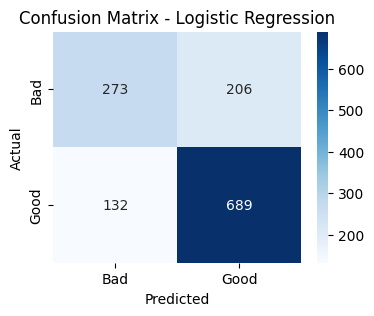

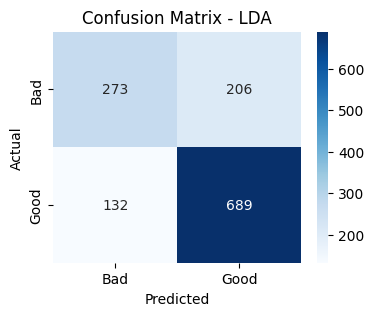

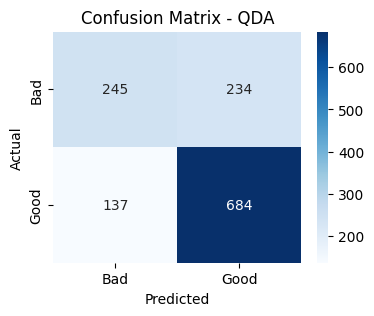

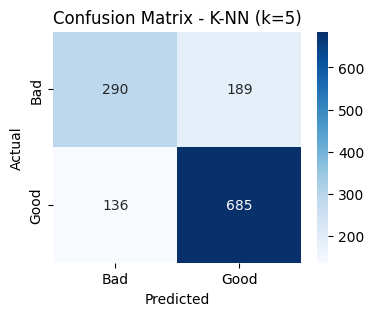

In [32]:
# Confusion Matrix
for name, model in classifiers.items():
    model.fit(X_train, y_train) # Âè™ÊòØÊÉ≥Ë©ï‰º∞Ê®°ÂûãÂú®ÁâπÂÆöÊ∏¨Ë©¶Ë≥áÊñôÈõÜ‰∏äÊïàËÉΩÁöÑË©±ÔºåÂâá‰∏çÈúÄË¶Å‰ΩøÁî® Cross-validate()ÈÄ≤Ë°åÊ≥õÂåñË∑üÈ†êÊ∏¨
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=["Bad", "Good"], yticklabels=["Bad", "Good"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {name}")
    plt.show()


#### **Â∞èÁµêË´ñ**

- Âõ†ÁÇ∫ÁôΩÈÖíË≥áÊñôÈáèÁÇ∫Á¥ÖÈÖíÁöÑ 3 ÂÄçÔºå**Ë≥áÊñô‰∏çÂπ≥Ë°°ÂæàÂèØËÉΩÂΩ±Èüø‰∫ÜÊ®°ÂûãÁöÑ Accuracy -> Ê®°ÂûãÂèØËÉΩÂÅèÂêëÈ†êÊ∏¨‰ΩîÂ§öÊï∏ÁöÑÈ°ûÂà•ÔºàÁôΩÈÖíÔºâ**„ÄÇ
- Âú®Ë©ï‰º∞Ê®°ÂûãÊôÇÔºåÊáâË©≤Êõ¥ÈáçË¶ñ precision„ÄÅrecall Âíå F1„ÄÇ
- Logistic Regression Âíå LDA Âú®Êï∏Êìö‰∏äÂ≠∏ÁøíÂà∞‰∫ÜÈùûÂ∏∏È°û‰ººÁöÑÊ±∫Á≠ñÈÇäÁïåÔºåÂèØËÉΩÊòØÂõ†ÁÇ∫**Êï∏ÊìöÁöÑÂàÜ‰ΩàËºÉÈÅ©ÂêàÁ∑öÊÄßÂàÜÈ°ûÊñπÊ≥ï**„ÄÇ
- QDA **ÂÖÅË®±ÈùûÁ∑öÊÄßÈÇäÁïå**Ôºå‰ΩÜÂ¶ÇÊûúÊï∏ÊìöÂØ¶Èöõ‰∏äÊòØÁ∑öÊÄßÂèØÂàÜÔºåÈÇ£È∫ºÂèØËÉΩÊúÉ Overfitting ÊàñÂ≠∏ÁøíÂà∞‰∏çÁêÜÊÉ≥ÁöÑÊ±∫Á≠ñÈÇäÁïå„ÄÇ
  
| **Ê®°Âûã** | **ÈÅ©Áî®ÊÉÖÂ¢É** | **ÂÑ™Âã¢** | **Âä£Âã¢** |
|----------|------------|--------|--------|
| **K-NNÔºàk=5Ôºâ** | ËøΩÊ±ÇÊúÄ‰Ω≥ÂàÜÈ°ûË°®Áèæ | ÊúÄÈ´ò Accuracy & F1 Score | Ë®àÁÆóÈáèËºÉÂ§ßÔºå‰∏çÈÅ©ÂêàÂ§ßÊï∏Êìö |
| **LDA / Logistic Regression** | ÈúÄË¶ÅÈ´òÊïà„ÄÅÂèØËß£ÈáãÁöÑÊ®°Âûã | ËºÉËºïÈáè„ÄÅÁµêÊûúÁõ∏Âêå | Á≤æÂ∫¶Áï•‰ΩéÊñº K-NN |
| **QDA** | Ëã•Êï∏ÊìöÂÖ∑ÊòéÈ°ØÈùûÁ∑öÊÄßÂàÜ‰Ωà | ÈÅ©ÂêàÈùûÁ∑öÊÄßÊ±∫Á≠ñÈÇäÁïå | Ë°®ÁèæËºÉÂ∑Æ |

### **Â∞á Type Âæû X ÁßªÈô§ÔºàÂõ†ÁÇ∫ÁôΩÈÖíËàáÁ¥ÖÈÖíË≥áÊñô‰∏çÂπ≥Ë°°Ôºâ**

In [33]:
X = df.drop(columns=['label','quality','type'])
y = df['label']

# feature Standardization
X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=2024)

# training / evaluation
evaluation_metrics = {}

for name, model in classifiers.items():
    model.fit(X_train, y_train) # Âè™ÊòØÊÉ≥Ë©ï‰º∞Ê®°ÂûãÂú®ÁâπÂÆöÊ∏¨Ë©¶Ë≥áÊñôÈõÜ‰∏äÊïàËÉΩÁöÑË©±ÔºåÂâá‰∏çÈúÄË¶Å‰ΩøÁî® Cross-validate()ÈÄ≤Ë°åÊ≥õÂåñË∑üÈ†êÊ∏¨
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    evaluation_metrics[name] = {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1 Score": f1
    }

    print(f"\n{name}:")
    print(f"  Accuracy: {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall: {rec:.4f}")
    print(f"  F1 Score: {f1:.4f}")



Logistic Regression:
  Accuracy: 0.7415
  Precision: 0.7716
  Recall: 0.8392
  F1 Score: 0.8040

LDA:
  Accuracy: 0.7423
  Precision: 0.7724
  Recall: 0.8392
  F1 Score: 0.8044

QDA:
  Accuracy: 0.7162
  Precision: 0.7441
  Recall: 0.8392
  F1 Score: 0.7888

K-NN (k=5):
  Accuracy: 0.7492
  Precision: 0.7829
  Recall: 0.8343
  F1 Score: 0.8078


#### **Â∞èÁµêË´ñ**

**üîπ ËÆäÊõ¥ÂâçÂæåÁµêÊûúÊØîËºÉ**
| **Ê®°Âûã** | **ÁßªÈô§ `type` Ââç - Accuracy** | **ÁßªÈô§ `type` Âæå - Accuracy** | **ËÆäÂåñ** |
|----------|-------------------|-------------------|--------|
| **Logistic Regression** | 0.7400 | 0.7415 | **+0.0015** |
| **LDA** | 0.7400 | 0.7423 | **+0.0023** |
| **QDA** | 0.7146 | 0.7162 | **+0.0016** |
| **K-NN (k=5)** | 0.7500 | 0.7492 | **-0.0008** |

| **Ê®°Âûã** | **ÁßªÈô§ `type` Ââç - F1 Score** | **ÁßªÈô§ `type` Âæå - F1 Score** | **ËÆäÂåñ** |
|----------|-------------------|-------------------|--------|
| **Logistic Regression** | 0.8030 | 0.8040 | **+0.0010** |
| **LDA** | 0.8030 | 0.8044 | **+0.0014** |
| **QDA** | 0.7867 | 0.7888 | **+0.0021** |
| **K-NN (k=5)** | 0.8083 | 0.8078 | **-0.0005** |


**1. Â§ßÈÉ®ÂàÜÊ®°ÂûãÁöÑË°®ÁèæÁï•ÊúâÊèêÂçáÔºàÁâπÂà•ÊòØ LDA„ÄÅQDAÔºâ**
   - **LDA ÁöÑ Accuracy +0.23%ÔºåF1 Score +0.14%**
   - **QDA ÁöÑ Accuracy +0.16%ÔºåF1 Score +0.21%**

**2. K-NN Ë°®ÁèæÂπæ‰πé‰∏çËÆäÔºåÁîöËá≥Á®çÂæÆ‰∏ãÈôç**
   - **Accuracy ‰∏ãÈôç 0.08%ÔºåF1 Score ‰∏ãÈôç 0.05%**ÔºåÈÄôË°®Á§∫ K-NN ÂèØËÉΩÊõ¥‰æùË≥¥ `type` ‰ΩúÁÇ∫ÂàÜÈ°ûÁâπÂæµ„ÄÇ
   - Áî±Êñº K-NN ÊòØÂü∫ÊñºÈÑ∞ËøëÈªûÁöÑË∑ùÈõ¢‰æÜÈÄ≤Ë°åÂàÜÈ°ûÔºå`type` Êèê‰æõ‰∫Ü„ÄåÁ¥ÖÈÖí vs. ÁôΩÈÖí„ÄçÁöÑÈ°çÂ§ñÂçÄÂàÜË≥áË®äÔºåÁßªÈô§ÂæåÂΩ±ÈüøËºÉÂÖ∂‰ªñÊ®°ÂûãÊõ¥ÊòéÈ°Ø„ÄÇ

**3. ÁßªÈô§ `type` Êï¥È´îÊèêÂçá‰∫ÜÂàÜÈ°ûÂô®ÁöÑÊ≥õÂåñËÉΩÂäõ**
- **LDA„ÄÅLogistic Regression„ÄÅQDA ÈÉΩÊúâÊâÄÊîπÂñÑ**ÔºåË°®Á§∫ `type` ÂèØËÉΩÊòØÂÄã„Äå**Êç∑ÂæëÁâπÂæµÔºàShortcut FeatureÔºâ**„Äç‰ΩøÂæóÊ®°ÂûãÈÅéÂ∫¶‰æùË≥¥Ëë°ËêÑÈÖíÁöÑÈ°ûÂà•ÔºåËÄåÈùûÊ†πÊìöÂåñÂ≠∏ÁâπÊÄßÈÄ≤Ë°åÂàÜÈ°û„ÄÇ

**4. ÁßªÈô§ `type` ‰πãÂæåÔºåÁµêÊûúËÆäÂæóÊõ¥ÂèØÈù†ÔºåÊõ¥ËÉΩÂèçÊò†ÈÖíÁöÑÂÖßÂú®ÁâπÂæµ„ÄÇ**


### **K-NN ÈÅ∏ÊìáÊúÄ‰Ω≥ K ÂÄº**

- ÁõÆÊ®ôÔºöÊâæÂà∞ÊúÄ‰Ω≥ÁöÑ K ÂÄºÔºå‰Ωø K-NN Ê®°ÂûãÁöÑÊ∫ñÁ¢∫Â∫¶ÊúÄÂ§ßÂåñ

**Â¶Ç‰ΩïÈÅ∏ÊìáÊúÄ‰Ω≥ K ÂÄºÔºü**

1. Ëã• Precision„ÄÅRecall Â∑ÆË∑ùÂ§ßÔºö
- **Precision È´ò‰ΩÜ Recall ‰Ωé ‚Üí ‰ª£Ë°®Ê®°ÂûãÈÅéÊñº‰øùÂÆàÔºåÊáâË©≤Èôç‰Ωé K ÂÄºÔºåËÆìÊ®°ÂûãÊõ¥ÊïèÊÑü„ÄÇ**
- **Recall È´ò‰ΩÜ Precision ‰Ωé ‚Üí ‰ª£Ë°®Ê®°ÂûãÂÆπÊòìË™§Âà§ÔºåÊáâË©≤Â¢ûÂä† K ÂÄºÔºå‰ΩøÊ®°ÂûãÊõ¥Á©©ÂÆö„ÄÇ**
      
2. **ÈÅ∏Êìá F1 Score ÊúÄ‰Ω≥ÁöÑ K ÂÄº**
- F1 Score Âπ≥Ë°°‰∫Ü Precision Âíå RecallÔºå**Â¶ÇÊûúÊüêÂÄã K ÂÄºÁöÑ F1 Score ÊòéÈ°ØËºÉÈ´òÔºåÈÄöÂ∏∏ÊòØÊúÄÂ•ΩÁöÑÈÅ∏Êìá„ÄÇ**

     K  Accuracy  Precision  Recall  F1 Score
0    1     0.766      0.812   0.821     0.816
1    2     0.715      0.848   0.670     0.749
2    3     0.749      0.790   0.822     0.805
3    4     0.746      0.828   0.756     0.791
4    5     0.758      0.789   0.843     0.815
5    6     0.757      0.820   0.789     0.804
6    7     0.758      0.788   0.845     0.816
7    8     0.757      0.809   0.807     0.808
8    9     0.759      0.786   0.851     0.817
9   10     0.756      0.803   0.815     0.809
10  11     0.756      0.783   0.850     0.815
11  12     0.757      0.800   0.822     0.811
12  13     0.752      0.779   0.849     0.813
13  14     0.757      0.799   0.823     0.811
14  15     0.756      0.782   0.853     0.816
15  16     0.755      0.793   0.829     0.811
16  17     0.754      0.779   0.854     0.815
17  18     0.755      0.791   0.834     0.812
18  19     0.751      0.775   0.854     0.813
19  20     0.752      0.786   0.835     0.810


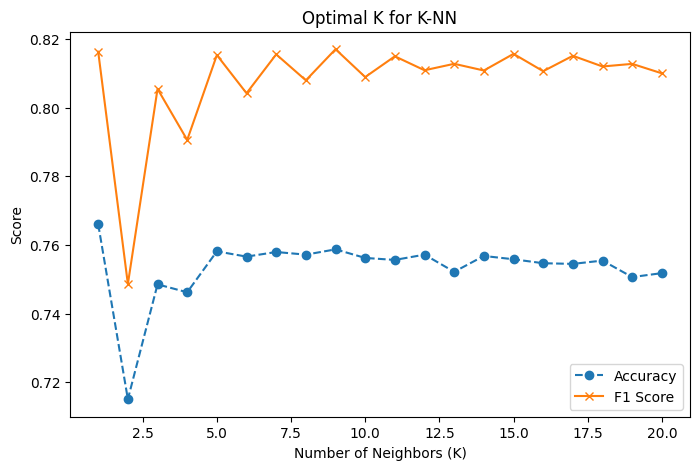

In [40]:
k_values = range(1, 21)
knn_accuracies =[]
knn_f1s = []
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    y_pred = cross_val_predict(knn, X_train, y_train, cv=cv)

    acc = accuracy_score(y_train, y_pred)
    prec = precision_score(y_train, y_pred)
    rec = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

    results.append((k, round(acc, 3), round(prec, 3), round(rec, 3), round(f1, 3)))
    knn_accuracies.append(acc)
    knn_f1s.append(f1)

results_df = pd.DataFrame(results, columns=['K', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results_df)

# Optimal K for K-NN
plt.figure(figsize=(8, 5))
plt.plot(k_values, knn_accuracies, marker='o', linestyle='dashed', label='Accuracy')
plt.plot(k_values, knn_f1s, marker='x', linestyle='solid', label='F1 Score')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Score")
plt.legend()
plt.title("Optimal K for K-NN")
plt.show()


#### **Result**

**1. K=1 ÁöÑ Accuracy ÊúÄÈ´òÔºå‰ΩÜÂèØËÉΩ Overfitting**ÔºåK ÂÄºÂ§™Â∞èÊ®°ÂûãÈÅéÂ∫¶‰æùË≥¥ÈÑ∞ËøëÁöÑÂñÆ‰∏ÄÊï∏ÊìöÈªûÔºåÂ∞éËá¥Ê≥õÂåñËÉΩÂäõ‰∏ãÈôçÔºåÈÄöÂ∏∏‰∏çÊúÉÈÅ∏Êìá‰ΩúÁÇ∫ÊúÄÁµÇÊ®°ÂûãÔºå**ÊáâÈÅøÂÖç K=1 Êàñ K=2**„ÄÇ

**2. K=7, K=9 ÊòØÊúÄ‰Ω≥ÁöÑÈÅ∏ÊìáÔºö**
- Âæû Accuracy Âíå F1 Score Á∂úÂêàËÄÉÈáèÔºå**K=7„ÄÅK=9** Ë°®ÁèæËâØÂ•ΩÔºå**F1 Score ÊúÄÈ´ò (0.816, 0.817)**Ôºå‰ª£Ë°® Precision Âíå Recall Á∂≠ÊåÅÊúÄ‰Ω≥Âπ≥Ë°°Ôºõ**Accuracy ‰πüÂæàÈ´ò (0.758, 0.759)** Ê≥õÂåñËÉΩÂäõËºÉ‰Ω≥Ôºö

- **K=7**:
  - Accuracy = 0.758
  - Precision = 0.788
  - Recall = 0.845
  - F1 Score = 0.816
- **K=9**:
  - Accuracy = 0.759
  - Precision = 0.786
  - Recall = 0.851
  - F1 Score = 0.817

**3. K > 10 ÂæåÊ®°ÂûãË°®ÁèæÁ©©ÂÆö**
Âæû K=10 ÈñãÂßãÔºåAccuracy Á¥ÑËêΩÂú® **0.752~0.757**ÔºåF1 Score Á¥Ñ **0.810~0.815**ÔºåËÆäÂãï‰∏çÂ§ßÔºö
- **K=15~K=20** ÁöÑ Accuracy Âπæ‰πéÊ≤íÊúâÈ°ØËëóÊèêÂçá„ÄÇ
- **Recall Âú® K > 15 Âæå‰øùÊåÅÂú® 0.83~0.85**Ôºå‰ΩÜ Precision Á®çÂæÆ‰∏ãÈôç„ÄÇ
- **ËºÉÂ§ßÁöÑ K ÂÄºÔºà15 ‰ª•‰∏äÔºâÊ®°ÂûãÂ∑≤Á∂ìË∂®ÊñºÂπ≥Á©©ÔºåÊ≤íÊúâÈ°ØËëóÊèêÂçáË°®Áèæ**ÔºåÂèçËÄåÂèØËÉΩÈÅéÂ∫¶Âπ≥ÊªëÔºå‰ΩøÊ®°ÂûãÂ∞çÂ∞ëÊï∏È°ûÂà•ÁöÑÂçÄÂàÜËÉΩÂäõ‰∏ãÈôç„ÄÇ

**4. ÊúÄÁêÜÊÉ≥ÁöÑÊòØ Precision Âíå Recall Âπ≥Ë°°ÔºåÈÅøÂÖçÈÅéÂ∫¶ÂÅèÂêëÂÖ∂‰∏≠‰πã‰∏ÄÔºö**
- **Precision ËºÉÈ´òÁöÑ K ÂÄº**ÔºàK=1, 5, 7, 10ÔºâÔºå‰ª£Ë°®Ê®°ÂûãËºÉË¨πÊÖéÔºåÈÅøÂÖçË™§Âà§„ÄåÂ•ΩÈÖí„Äç„ÄÇ
- **Recall ËºÉÈ´òÁöÑ K ÂÄº**ÔºàK=9, 11, 17ÔºâÔºå‰ª£Ë°®Ê®°ÂûãËÉΩÂ§†ÊâæÂà∞Êõ¥Â§ö„ÄåÂ•ΩÈÖí„ÄçÔºå‰ΩÜÂèØËÉΩÊúÉÊúâËºÉÂ§öË™§Âà§„ÄÇ